In [1]:
# ALL THE IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv("Open_Univ_Data_Final_merged.csv")

In [3]:
df.head()

,id_student,code_module,code_presentation,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
0,11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,55<=,0,240,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,Pass
1,28400,AAA,2013J,F,Scotland,HE Qualification,3.0,35-55,0,60,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,Pass
2,31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,35-55,0,60,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,Pass
3,32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0-35,0,60,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,Pass
4,38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,35-55,0,60,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,Pass


In [4]:
from xgboost import XGBClassifier, plot_importance
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_curve, auc

In [5]:
df.drop(columns=['date_unregistration', 'Exam_score','TMA_score','CMA_score','mean_score','registration_before','unique', 'age_band' ], inplace=True)
df.shape
df.set_index('id_student',inplace=True)
df = df.dropna()

In [6]:
target = df.columns[-1]
train_cols = df.columns[0:-1]

In [7]:
features_list = list(df.columns)[0:-1]
print(features_list)

['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'num_of_prev_attempts', 'studied_credits', 'disability', 'date_registration', 'date_registration_pos', 'dataplus', 'dualpane', 'externalquiz', 'folder', 'forumng', 'glossary', 'homepage', 'htmlactivity', 'oucollaborate', 'oucontent', 'ouelluminate', 'ouwiki', 'page', 'questionnaire', 'quiz', 'repeatactivity', 'resource', 'sharedsubpage', 'subpage', 'url', 'sum_click', 'days_interacted', 'daily_click']


Text(0.55, 1.25, 'Univariate Plots')

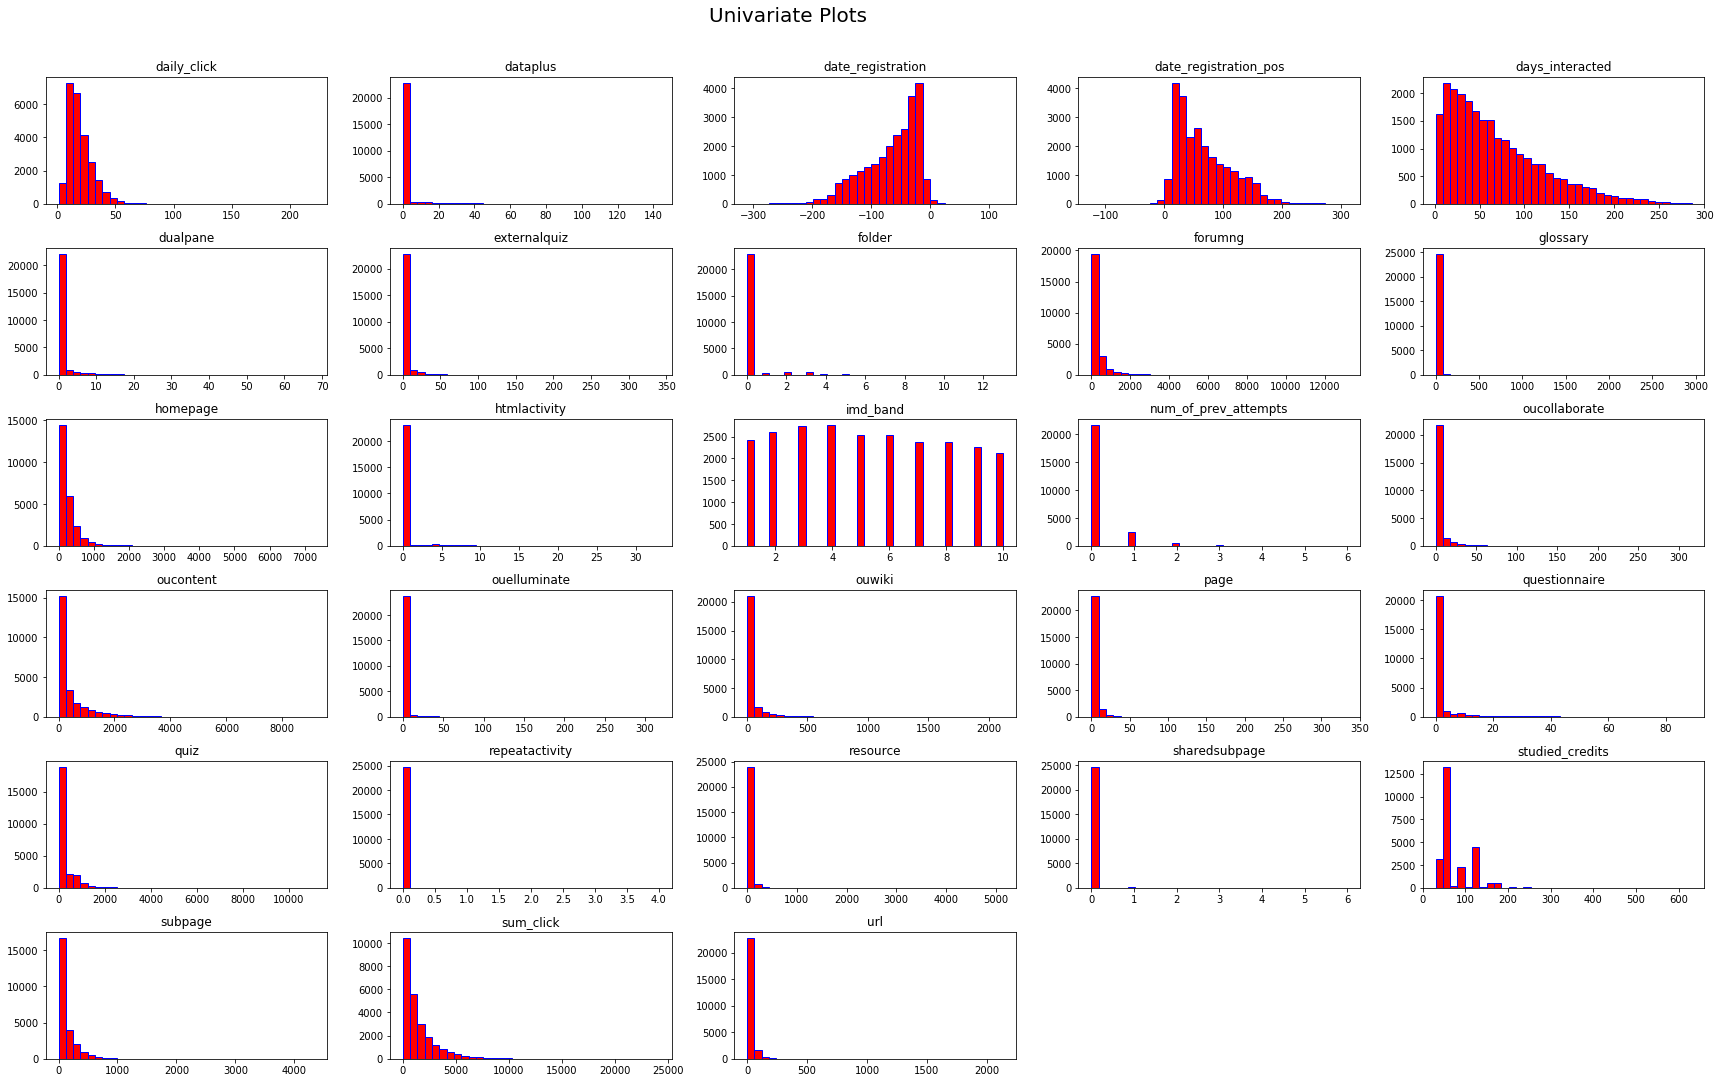

In [8]:
df[features_list].hist(bins=35, edgecolor = 'b', linewidth=1.0, xlabelsize=10, ylabelsize=10, grid=False, figsize=(20,12), color='red')
plt.tight_layout(rect=(0,0,1.2,1.2))
plt.suptitle('Univariate Plots', x = 0.55, y = 1.25, fontsize = 20)

In [9]:
df = df.replace(to_replace ="Distinction", value ="Pass")
df = df.replace(to_replace ="Withdrawn", value ="Fail")
data = df
data = data.replace(to_replace ="Pass", value =1)
data = data.replace(to_replace ="Fail", value =0)

In [10]:
data.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,date_registration,...,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click,final_result
id_student,,,,,,,,,,,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,0,240,N,-159.0,...,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000,1
28400,AAA,2013J,F,Scotland,HE Qualification,3.0,0,60,N,-53.0,...,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500,1
31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,0,60,N,-52.0,...,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715,1
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0,60,N,-176.0,...,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429,1
38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,0,60,N,-110.0,...,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902,1


In [11]:
X = data[train_cols]
X.head()

,code_module,code_presentation,gender,region,highest_education,imd_band,num_of_prev_attempts,studied_credits,disability,date_registration,...,questionnaire,quiz,repeatactivity,resource,sharedsubpage,subpage,url,sum_click,days_interacted,daily_click
id_student,,,,,,,,,,,,,,,,,,,,,
11391,AAA,2013J,M,East Anglian Region,HE Qualification,10.0,0,240,N,-159.0,...,0.0,0.0,0.0,13.0,0.0,32.0,5.0,934,40,23.350000
28400,AAA,2013J,F,Scotland,HE Qualification,3.0,0,60,N,-53.0,...,0.0,0.0,0.0,12.0,0.0,87.0,48.0,1435,80,17.937500
31604,AAA,2013J,F,South East Region,A Level or Equivalent,6.0,0,60,N,-52.0,...,0.0,0.0,0.0,19.0,0.0,144.0,90.0,2158,123,17.544715
32885,AAA,2013J,F,West Midlands Region,Lower Than A Level,6.0,0,60,N,-176.0,...,0.0,0.0,0.0,45.0,0.0,79.0,14.0,1034,70,14.771429
38053,AAA,2013J,M,Wales,A Level or Equivalent,9.0,0,60,N,-110.0,...,0.0,0.0,0.0,11.0,0.0,91.0,45.0,2445,143,17.097902


In [12]:
X_enc = pd.get_dummies(X, prefix_sep='.')
X_enc.head()
y = df[target]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_enc, y, test_size = 0.3, random_state = 33)

In [14]:
X_train.shape, X_test.shape

((17354, 61), (7438, 61))

In [15]:
%%time

xgb = XGBClassifier(objective='binary:logistic', random_state=33, n_jobs = -1)
xgb.fit(X_train, y_train)

CPU times: user 4.09 s, sys: 35.6 ms, total: 4.12 s
Wall time: 1.31 s


In [16]:
xgb_pred = xgb.predict(X_test)

In [17]:
accuracy_score(y_test, xgb_pred)

0.8569507932239849

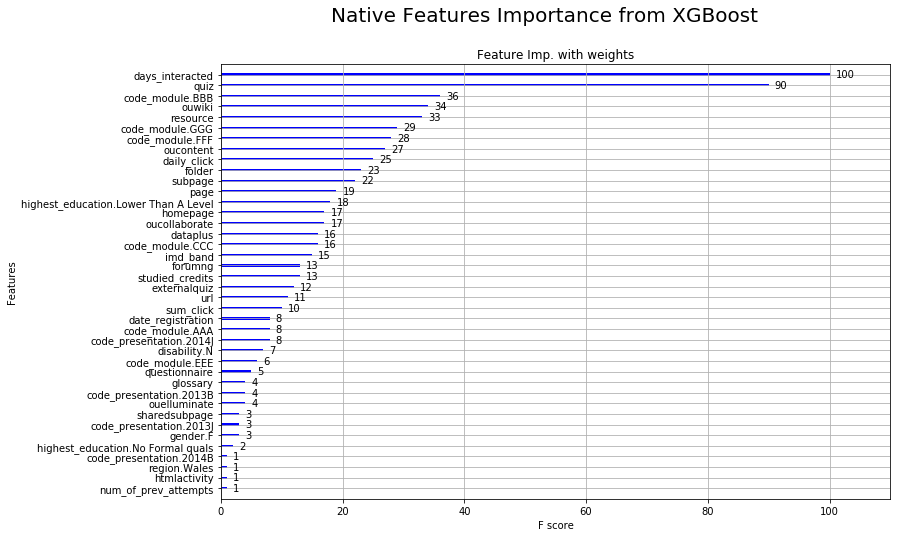

In [28]:
fig = plt.figure(figsize=(12,8))
title = fig.suptitle("Native Features Importance from XGBoost", fontsize = 20)
ax1 = fig.add_subplot(1,1,1)
plot_importance(xgb, importance_type='weight', ax = ax1, color='blue')
ax1.set_title("Feature Imp. with weights");

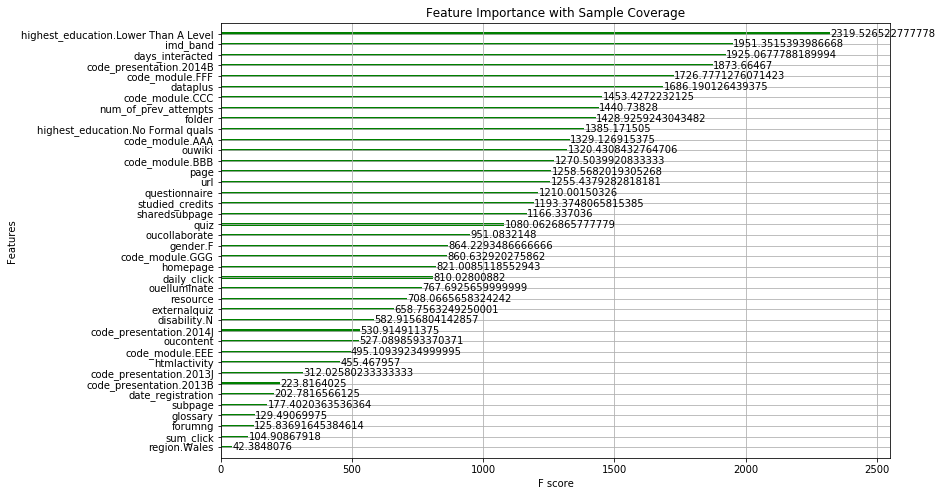

In [29]:
fig1 = plt.figure(figsize=(12,8))
ax2 = fig1.add_subplot(1,1,1)
plot_importance(xgb, importance_type='cover', ax = ax2, color='green')
ax2.set_title("Feature Importance with Sample Coverage");


Text(0.5, 1.0, 'Split Mean Gain')

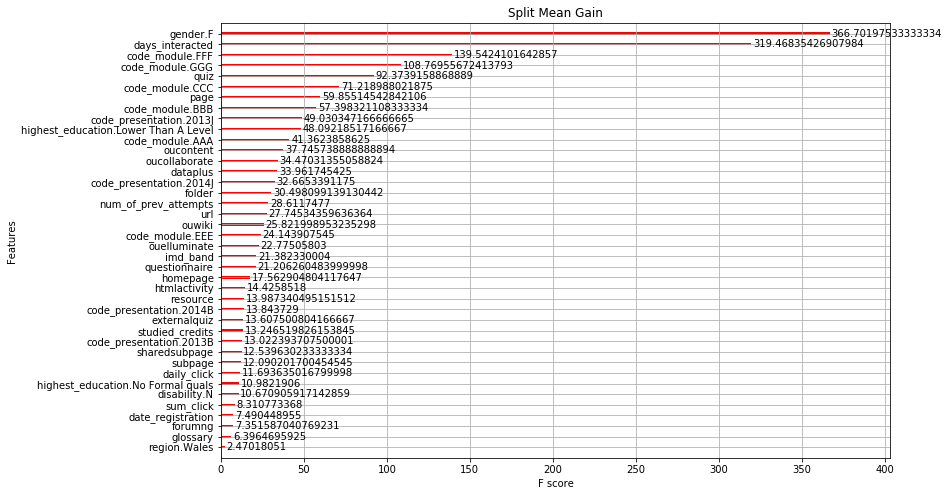

In [31]:
fig2 = plt.figure(figsize=(12,8))

ax3 = fig2.add_subplot(1,1,1)
plot_importance(xgb, importance_type='gain', ax = ax3, color='red')
ax3.set_title("Split Mean Gain")